In [10]:
######## Create, Train, and Predict Models

# Loads train, test, and val datasets
# Instantiates Models
# Trains Models
# Predicts using Models

Import All Required Modules

In [1]:
import sys

# Manually add the project root to sys.path
sys.path.append('/Users/joaquinuriarte/Documents/GitHub/sports-betting/')

# === STEP 0: Imports
from modules.model_manager.trainer.trainer import Trainer
from modules.model_manager.predictor.predictor import Predictor
from modules.model_manager.factories.model_factory import ModelFactory
from modules.model_manager.helpers.configuration_loader import ConfigurationLoader as MMConfigLoader
from modules.model_manager.model_manager import ModelManager
from sklearn.model_selection import KFold
from modules.data_structures.model_dataset import ModelDataset
from model_binaries.utils.binary_utils import save_entity, load_entity, cross_val_train, compute_f1, graph_entity, assess_dataset_balance, evaluate_modelV01_predictions, plot_margin_distributions, swap_team_sides_in_dataset

2025-01-31 16:53:34.506553: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [2]:
# === STEP 1: Dependency Instantiations And Global Variable Declarations

## === MODEL MANAGER
yaml_path0 = '/Users/joaquinuriarte/Documents/GitHub/sports-betting/configs/model_v01/model_v01_000.yaml'
yaml_path1 = '/Users/joaquinuriarte/Documents/GitHub/sports-betting/configs/model_v01/model_v01_001.yaml'
yaml_path2 = '/Users/joaquinuriarte/Documents/GitHub/sports-betting/configs/model_v01/model_v01_002.yaml'
yaml_path3 = '/Users/joaquinuriarte/Documents/GitHub/sports-betting/configs/model_v01/model_v01_003.yaml'
yaml_path4 = '/Users/joaquinuriarte/Documents/GitHub/sports-betting/configs/model_v01/model_v01_004.yaml'
yaml_path5 = '/Users/joaquinuriarte/Documents/GitHub/sports-betting/configs/model_v01/model_v01_005.yaml'
yaml_path6 = '/Users/joaquinuriarte/Documents/GitHub/sports-betting/configs/model_v01/model_v01_006.yaml'
yaml_path6_02 = '/Users/joaquinuriarte/Documents/GitHub/sports-betting/configs/model_v01/model_v01_006_02.yaml'
yaml_path6V2 = '/Users/joaquinuriarte/Documents/GitHub/sports-betting/configs/model_v01/model_v01_006V2.yaml'
yaml_path10 = '/Users/joaquinuriarte/Documents/GitHub/sports-betting/configs/model_v01/model_v01_010.yaml'
yaml_path11 = '/Users/joaquinuriarte/Documents/GitHub/sports-betting/configs/model_v01/model_v01_011.yaml'
yaml_path12 = '/Users/joaquinuriarte/Documents/GitHub/sports-betting/configs/model_v01/model_v01_012.yaml'
yaml_path13 = '/Users/joaquinuriarte/Documents/GitHub/sports-betting/configs/model_v01/model_v01_013.yaml'
yaml_path14 = '/Users/joaquinuriarte/Documents/GitHub/sports-betting/configs/model_v01/model_v01_014.yaml'


checkpoint = '/Users/joaquinuriarte/Documents/GitHub/sports-betting/models'
trainer = Trainer(checkpoint)
predictor = Predictor()
model_factory = ModelFactory()
mm_configuration_loader = MMConfigLoader()

Load Train Datasets into Memory

In [3]:
# File path to load train, test, and val datasets
train_test_val_folder_path = "/Users/joaquinuriarte/Documents/GitHub/sports-betting/processed_datasets/model_v01/scaler"

In [4]:
train_dataset = load_entity(train_test_val_folder_path, "scaled_train.pkl")
validation_dataset = load_entity(train_test_val_folder_path, "scaled_val.pkl")

In [5]:
randomized_train_dataset = swap_team_sides_in_dataset(train_dataset, team_a_prefix="A_", team_b_prefix="B_", label_a_name="final_score_A", label_b_name="final_score_B", add_home_feature=True, swap_probability=.5)
randomized_val_dataset = swap_team_sides_in_dataset(validation_dataset, team_a_prefix="A_", team_b_prefix="B_", label_a_name="final_score_A", label_b_name="final_score_B", add_home_feature=True, swap_probability=.5)

Load & Train on predefined trained and val datasets

In [6]:
# === STEP 4: MODEL MANAGER
yamls = [yaml_path14]
model_manager = ModelManager(trainer, predictor, model_factory, mm_configuration_loader)

In [7]:
models = model_manager.create_models(yamls)

In [8]:
model_manager.train(models, [(randomized_train_dataset, randomized_val_dataset)], save_after_training=True)

INFO:root:Training model '50fa9ddbd0f225382b574e67f7515d63' for 20 epochs with batch size 32.


Epoch 1/20
637/637 [==============================] - 26s 35ms/step - loss: 698.5713 - mse: 694.5645 - mae: 16.8151 - val_loss: 197.9104 - val_mse: 194.1095 - val_mae: 11.1111
Epoch 2/20
637/637 [==============================] - 22s 34ms/step - loss: 202.7331 - mse: 198.8001 - mae: 11.2260 - val_loss: 211.0874 - val_mse: 207.1446 - val_mae: 11.5902
Epoch 3/20
637/637 [==============================] - 21s 34ms/step - loss: 181.6555 - mse: 177.7514 - mae: 10.6087 - val_loss: 288.6170 - val_mse: 284.9104 - val_mae: 13.6919
Epoch 4/20
637/637 [==============================] - 22s 35ms/step - loss: 177.9510 - mse: 174.0128 - mae: 10.4695 - val_loss: 220.0069 - val_mse: 215.4123 - val_mae: 11.7494
Epoch 5/20
637/637 [==============================] - 22s 34ms/step - loss: 175.1401 - mse: 171.2020 - mae: 10.4087 - val_loss: 230.1808 - val_mse: 226.3426 - val_mae: 12.1619
Epoch 6/20
637/637 [==============================] - 22s 35ms/step - loss: 173.0461 - mse: 169.1197 - mae: 10.3427 - va

INFO:root:Model '50fa9ddbd0f225382b574e67f7515d63': Finished training.


Model saved successfully at: models/50fa9ddbd0f225382b574e67f7515d63/model_weights_50fa9ddbd0f225382b574e67f7515d63.pth


Assess Performance

In [11]:
predictions = models[0].predict(randomized_val_dataset.examples, return_target_labels=True)

In [14]:
# Get all metrics for trained model on val dataset predictions
metrics = evaluate_modelV01_predictions(predictions, "final_score_A", "final_score_B", "target_final_score_A", "target_final_score_B")
metrics

NameError: name 'ç' is not defined

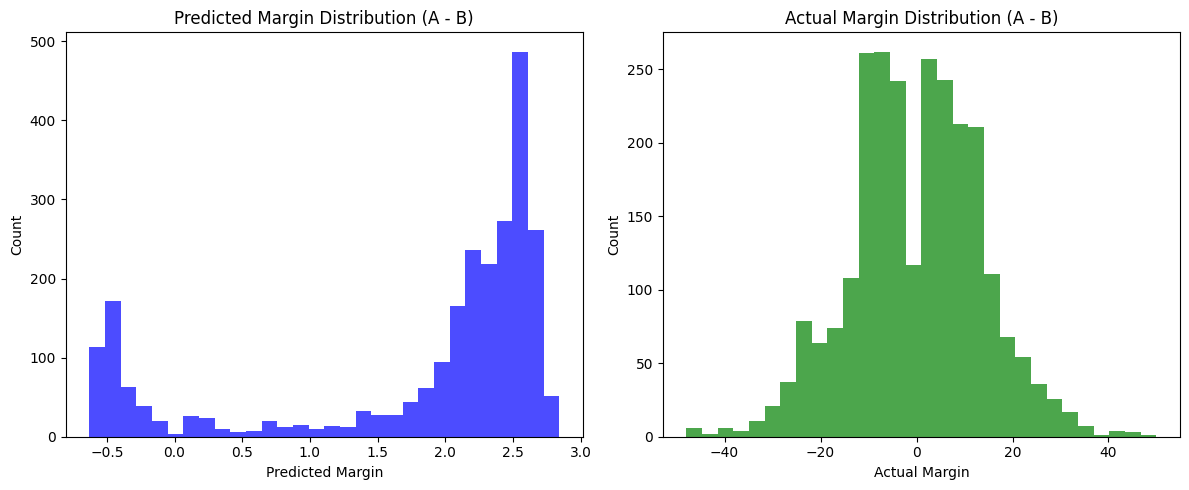

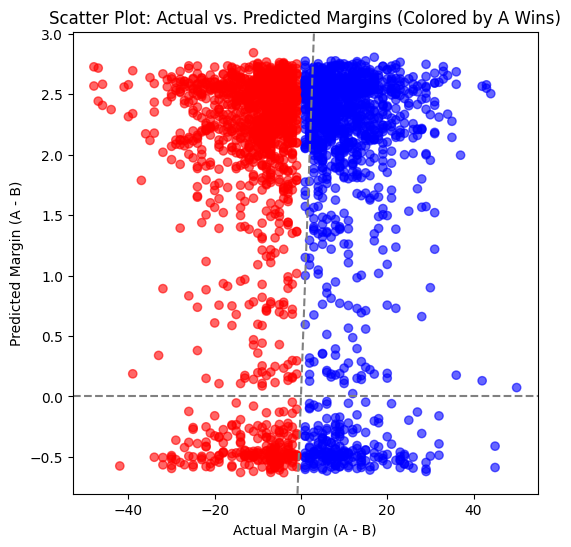

In [74]:
plot_margin_distributions(predictions, "final_score_A", "final_score_B", "target_final_score_A", "target_final_score_B")

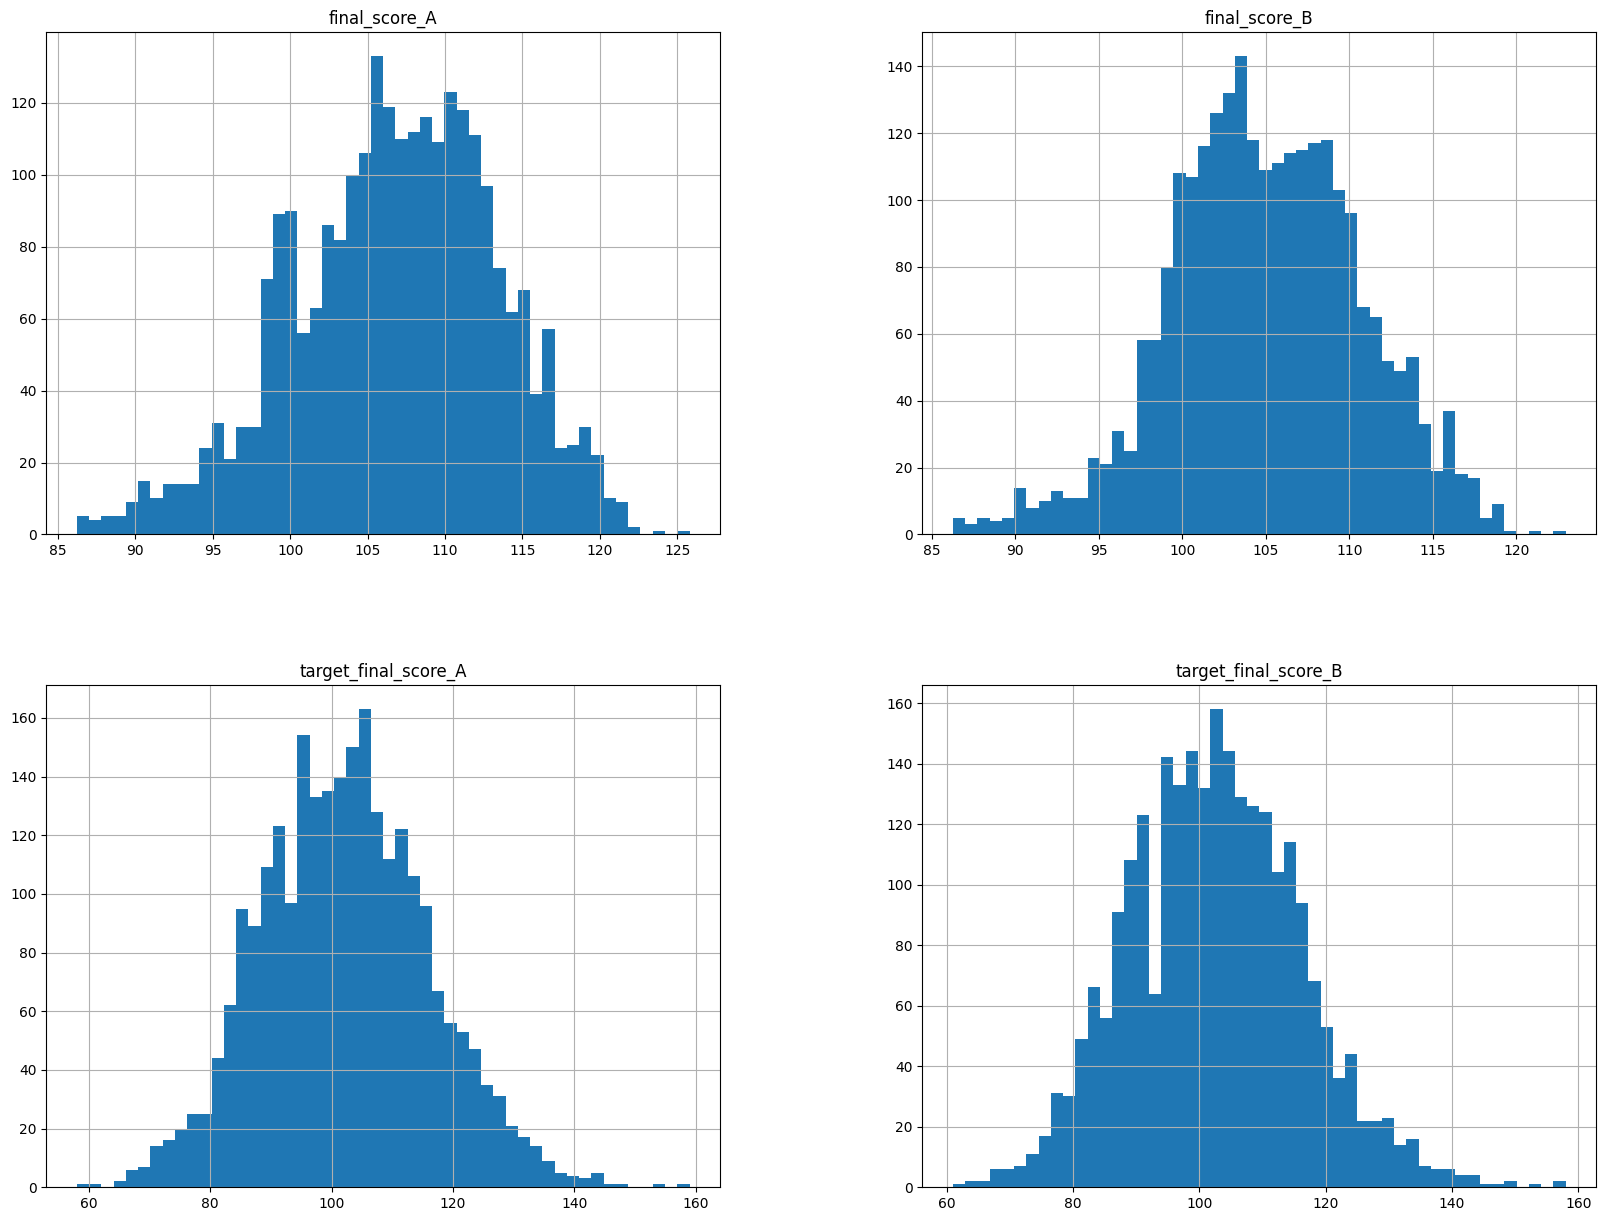

In [75]:
# Graph distribution of predictions against labels 
graph_entity(predictions=predictions,bins=50)

In [76]:
# Print actual predictions against labels
predictions

,final_score_A,final_score_B,target_final_score_A,target_final_score_B
0,110.877281,108.353592,90.0,100.0
1,105.179222,103.057579,85.0,113.0
2,107.352524,105.409805,92.0,84.0
3,105.848152,103.656120,89.0,100.0
4,121.761009,118.984741,113.0,105.0
...,...,...,...,...
2541,101.162651,100.736923,101.0,112.0
2542,109.514626,107.065903,98.0,95.0
2543,104.644356,102.548454,99.0,100.0
2544,109.042564,106.640495,124.0,105.0


Launch Tensorboard

In [ ]:
%tensorboard --logdir=./logs

CROSS VALIDATION ALTERNATIVE

Create and Train Models Using KFold Cross Validation

In [24]:
# === STEP 4: MODEL MANAGER
yamls = [yaml_path3]
model_manager = ModelManager(trainer, predictor, model_factory, mm_configuration_loader)

Get Averaged Metrics for KFold

In [ ]:
avg_metrics = cross_val_train(model_manager=model_manager, yamls=yamls, train_dataset=train_dataset, n_splits=5)
f1 = compute_f1(avg_metrics["val_precision"], avg_metrics["val_recall"])
print(avg_metrics)
print(f1)